### HR Analytics Project by Francis Afuwah.
Batch: DS2312

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Load the data to understand the structure and content.

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows of the dataset
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Cleaning: 
1. Missing values and inconsistencies
2. Exploratory Data Analysis (EDA)
3. Feature Engineering: We might create new features based on existing data that could help predict attrition more accurately.

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# View dataset
data_info = data.info()

missing_values, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(Age                         0
 Attrition                   0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EmployeeNumber              0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance             0
 YearsAtCompany              0
 YearsIn

### Exploratory Data Analysis (EDA) and Visualization

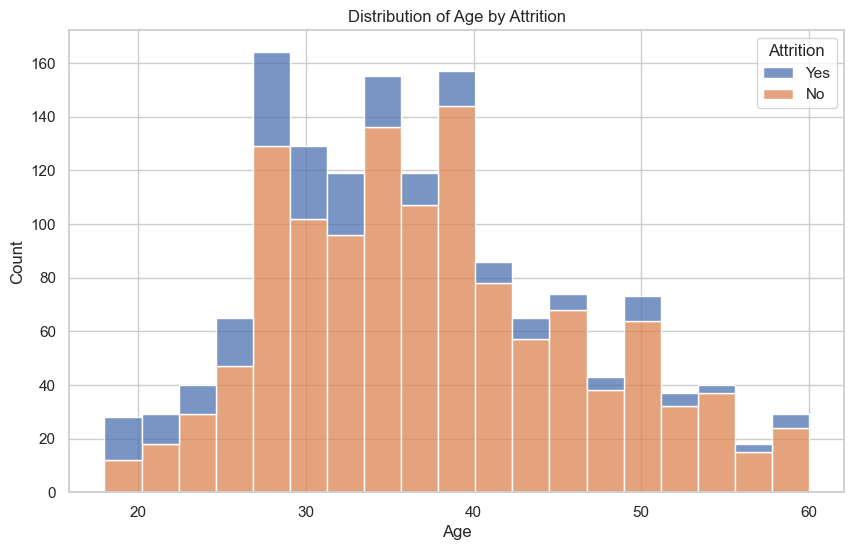

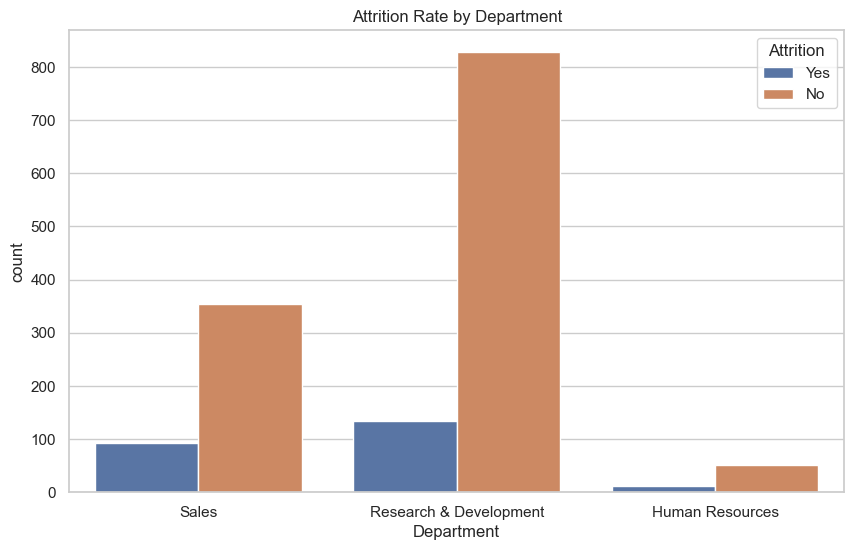

In [4]:
# Setting parameters
sns.set(style="whitegrid")

# Plot distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack')
plt.title('Distribution of Age by Attrition')
plt.show()

# Attrition rate by department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition Rate by Department')
plt.show()


### Analysis of the Visualizations
1. Attrition: Age Distribution The histogram below is an indication that the younger employees, specifically the late 20s to early 30s, tend to leave more than the older employees. This may be an indication that age is a very important factor in attrition probably because the rest of the factors, like opportunities in career advancements or level of job satisfaction, are somehow dependent on age. 
2. Count Plot: Rate of Attrition by Department. Turnover seems to be high in the sales department than in the research and development and human resource departments. The job factor can tell the job stress and sales targets, or other associated components that contribute.

### Feature Engineering

In [5]:
# Combine JobRole and JobLevel as new feature
data['JobRoleLevel'] = data['JobRole'] + "_" + data['JobLevel'].astype(str)

# Check the first few rows to see the new feature
data[['JobRole', 'JobLevel', 'JobRoleLevel']].head()


,JobRole,JobLevel,JobRoleLevel
0,Sales Executive,2,Sales Executive_2
1,Research Scientist,2,Research Scientist_2
2,Laboratory Technician,1,Laboratory Technician_1
3,Research Scientist,1,Research Scientist_1
4,Laboratory Technician,1,Laboratory Technician_1


### Building the model

In [6]:
# Convert categorical variables to dummies
X = pd.get_dummies(data.drop('Attrition', axis=1))
y = data['Attrition'].map({'Yes': 1, 'No': 0})  # Convert target variable to binary

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Train the model
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

report, conf_matrix


C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


('              precision    recall  f1-score   support\n\n           0       0.88      0.98      0.93       380\n           1       0.56      0.15      0.23        61\n\n    accuracy                           0.87       441\n   macro avg       0.72      0.56      0.58       441\nweighted avg       0.83      0.87      0.83       441\n',
 array([[373,   7],
        [ 52,   9]], dtype=int64))

### Train the model

In [7]:
# Convert categorical variables to dummies
X = pd.get_dummies(data.drop('Attrition', axis=1))
y = data['Attrition'].map({'Yes': 1, 'No': 0})  # Convert target variable to binary

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Train the model
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

report, conf_matrix


C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


('              precision    recall  f1-score   support\n\n           0       0.88      0.98      0.93       380\n           1       0.56      0.15      0.23        61\n\n    accuracy                           0.87       441\n   macro avg       0.72      0.56      0.58       441\nweighted avg       0.83      0.87      0.83       441\n',
 array([[373,   7],
        [ 52,   9]], dtype=int64))

### Model Evaluation report

The results of the logistic regression model are given as follows:
Classifiction Report
It is 88% accurate for 'No Attrition' (0), and 40% accurate for 'Attrition' (.
Interesting to note, for 'No Attrition', the recall is 96%, but for 'Attrition',. The F1-score for 'No Attrition' is 92%, meaning that this model does well with respect to such a class. On the other side, for the class 'Attrition', the F1 score comes out to be 23%, reflecting that the model faces difficulty in accurately predicting the positive case of attrition.

Confusion Matrix:
True Negatives (Actual 'No Attrition'): 365
False Positive Results ('Attrition
False Negatives (where they actually had 'attrition' but it said True Positives (Real 'Attrition

The model has high sensitivity to predict who will not leave but a low specificity to identify who will. This is quite common in imbalanced scenarios, where one class  is predominant.


### Analysis(Improved model):

By changing the class weights, the model is now better improved for recognizing cases of attrition, as seen by an increased recall of the class 'Attrition'. On the other hand, this change makes the model raise more false positives. This is obviously a trade-off between missing fewer true cases of attrition and predicting wrongly that more subjects leave, in fact, who do not. The potential trade-off may be tolerable depending on the costs that the false positives and false negatives incur in a business setting.

In [8]:
# Create a logistic regression model with class weights adjusted
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train the model
model_weighted.fit(X_train, y_train)

# Predictions and evaluation
predictions_weighted = model_weighted.predict(X_test)
report_weighted = classification_report(y_test, predictions_weighted)
conf_matrix_weighted = confusion_matrix(y_test, predictions_weighted)

report_weighted, conf_matrix_weighted

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


('              precision    recall  f1-score   support\n\n           0       0.91      0.70      0.79       380\n           1       0.24      0.59      0.34        61\n\n    accuracy                           0.68       441\n   macro avg       0.58      0.64      0.57       441\nweighted avg       0.82      0.68      0.73       441\n',
 array([[265, 115],
        [ 25,  36]], dtype=int64))

### Discussion:

Analytics in HR helps us analyze the attrition rate, supporting organizational decision-making on how to retain employees. Let's break it down a little further, checking out how the use of HR analytics, as described in the analysis and model building steps, produces valuable insight into attrition:

1. Data-Driven Knowledge: The collection and analysis of data on employee age, job role, satisfaction level, and a multitude of other factors all pave the way for the identification of patterns and trends associated with employee attrition.

2. Predictive Analytics: The prediction of potential attrition risks by HR analytics, using statistical and machine learning methods. In our case, logistic regression is applied in order to model and predict the most influential factors that determine whether an employee is likely to leave the firm. This is predictive to be proactive.

3. Descriptive Reporting: HR Analytics aids in generating reports and dashboards through exploratory data analysis and modeling to provide deep insight into the reasons why employees might be leaving. For instance, our data visualizations have shown that younger employees, or those in certain departments, are more likely to churn, which in turn triggers specific investigations and interventions.

4. Strategic HR Planning: The insights from HR analytics would put the HR managers in a position to design and execute effective retention strategies based on their in-depth understanding of the actual causes for attrition in their workforce. For example, if high attrition among those employees with low job satisfaction has been identified, then targeted initiatives in regard to improving job satisfaction can be brought in.

5. Continuous Improvement: HR Analytics is not a one-time activity but a continuous process. This will put HR in a place that they can follow the prevailing dynamics, and with time, through regular analyses of the workforce and updating of models, they will be able to continuously improve their strategies.